In [1]:
import numpy as np
import re # RegEX - Regular Expression library from python
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
class DataProcessing():
    def __init__(self, file, date, period, dataname, title): 
        """This class takes in the filename, date, timeperiod in months and the datatype you're interested in"""
        self.file = file
        self.date = date
        self.period = period
        self.dataname = dataname
        self.title = title
        
    def findDate(self):
        with open(self.file, "r") as file: # "with" makes sure that the file gets properly closed when executed, "r" opens file in readmode, "w" in writemode
            self.lines = file.readlines() #how to set lines as an attribute of ClimatePlot()??
            for row in self.lines: 
                if row.find(self.date) != -1: # -1 means that find() didn't find the string
                    beginning = self.lines.index(row) #global assignment?!
                    end = beginning+self.period
                    self.lineRange = np.arange(beginning, end) #important for deleteLines
        return self.lineRange
        return self.lines

              
    def deleteLines(self):
        for i in range(len(self.lines)-1, -1, -1): #decrementing starting from len(lines)-1 to -1(actually 0) by a step of 1
            if i in self.lineRange:
                self.lines[i] = re.sub(" ", "", self.lines[i])
                self.lines[i] = self.lines[i].split(";")
            else: 
                self.lines.pop(i) #remove unnecessary lines from the list "lines"
            i -= 1
        return self.lines
            
    def changeTypes(self): 
        for line in self.lines: #for list in lines
            for entry in line:
                if re.search("e", entry) is None: # search for any letter??!
                    if re.search("\.", entry) is None:
                        line[line.index(entry)] = int(entry)
                    else:
                        line[line.index(entry)] = float(entry)
        return self.lines
    
    def makeArray(self): 
        self.myArray = np.array(self.lines, dtype=object)
        return self.myArray
    
    def dataGraph(self): 
        month = np.arange(1, self.period+1)
        selection = self.myArray[:, self.dataname] #number of the column to look at
        label = self.title
        self.dataList = [month, selection, label]
        #return self.dataList #why is this unnecessary?
        
    def plotData(self): #optional function for plotting the graph
        month = np.arange(1,self.period+1)
        selection = self.myArray[:, self.dataname] #number of the column to look at
        fig, ax = plt.subplots()
        plot = ax.plot(month, selection, label=self.title)


In [3]:
def DataGraph(plotTitle, xLabel, yLabel, *dataLists):
    fig, ax = plt.subplots(figsize =(16, 9), layout="constrained")
    for dataList in dataLists: 
        ax.plot(dataList[0], dataList[1], label = dataList[2])
    ax.set_title(plotTitle, size="xx-large")
    ax.set_xlabel(xLabel, size = "x-large")
    ax.set_ylabel(yLabel, size ="x-large")
    ax.set_xticks(np.arange(1, 13, 1)) #ticks from range 1 to 12 in space of 1
    ax.set_yticks(np.arange(0, 30, 5))
    ax.legend() #prints legend
    plt.show() #not necessary        

In [4]:
data2020 = DataProcessing("Darmstadt_19950801_20221231_00917.txt", "20200101", 12, 5, "2020")
data2020.findDate()
data2020.deleteLines()
data2020.changeTypes()
data2020.makeArray()
data2020.dataGraph()
#data2020.plotData()

In [5]:
data2000 = DataProcessing("Darmstadt_19950801_20221231_00917.txt", "20000101", 12, 5, "2000")
data2000.findDate()
data2000.deleteLines()
data2000.changeTypes()
data2000.makeArray()
data2000.dataGraph()
#data2010.plotData()

In [6]:
data1940 = DataProcessing("Darmstadt_18310101_19870930_00920.txt", "19400101", 12, 5, "1940")
data1940.findDate()
data1940.deleteLines()
data1940.changeTypes()
data1940.makeArray()
data1940.dataGraph()

In [7]:
data1900 = DataProcessing("Darmstadt_18310101_19870930_00920.txt", "19000101", 12, 5, "1900")
data1900.findDate()
data1900.deleteLines()
data1900.changeTypes()
data1900.makeArray()
data1900.dataGraph()

In [8]:
data1860 = DataProcessing("Darmstadt_18310101_19870930_00920.txt", "18600101", 12, 5, "1860")
data1860.findDate()
data1860.deleteLines()
data1860.changeTypes()
data1860.makeArray()
data1860.dataGraph()

In [9]:
data1840 = DataProcessing("Darmstadt_18310101_19870930_00920.txt", "18400101", 12, 5, "1840")
data1840.findDate()
data1840.deleteLines()
data1840.changeTypes()
data1840.makeArray()
data1840.dataGraph()

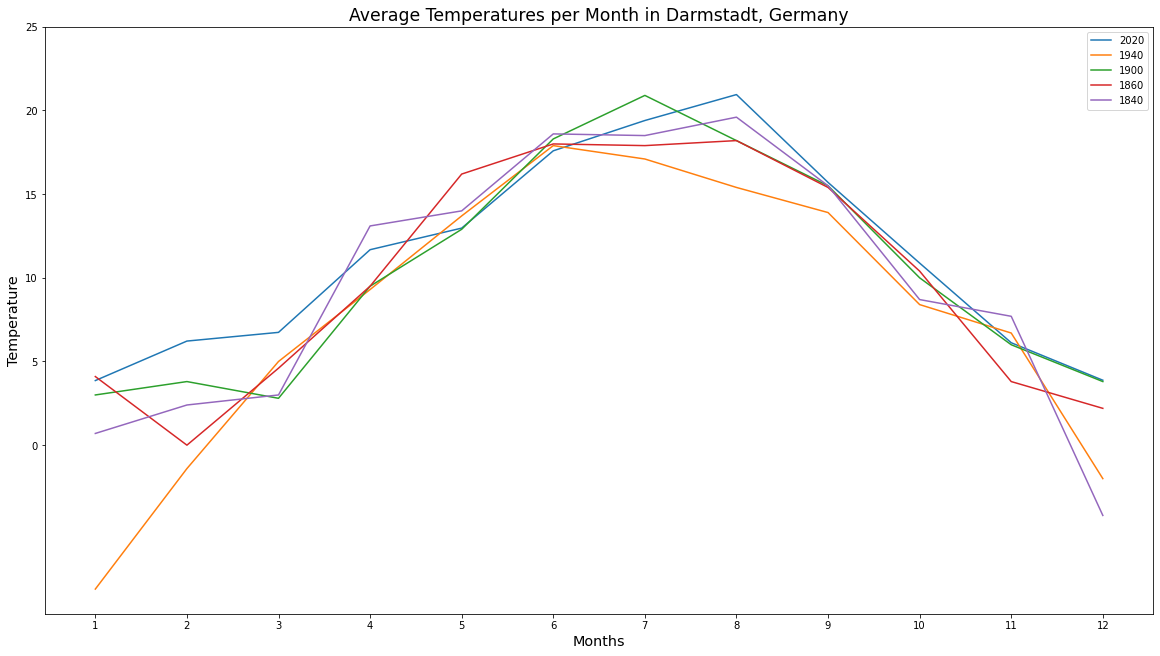

In [10]:
DataGraph("Average Temperatures per Month in Darmstadt, Germany","Months", "Temperature", data2020.dataList, data1940.dataList, data1900.dataList, data1860.dataList, data1840.dataList)